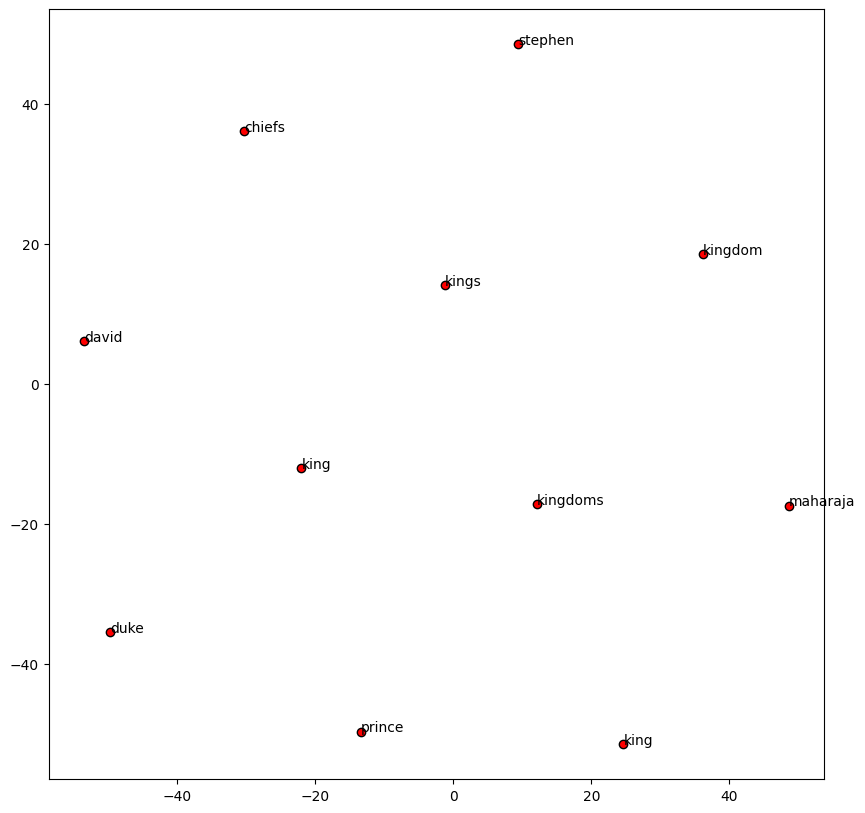

In [3]:

# Step 1: Install necessary libraries
!pip install gensim annoy matplotlib

# Step 2: Download and load FastText word vectors
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip

# Step 3: Load the word vectors into memory
import gensim
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Load word vectors (assuming 'wiki-news-300d-1M.vec' is in the input directory)
model_path = '/kaggle/working/wiki-news-300d-1M.vec'
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=False)

# Step 4: Store the vectors in a vector index
vector_size = 300
index = AnnoyIndex(vector_size, 'angular')

for i, word in enumerate(model.index_to_key):
    index.add_item(i, model[word])

index.build(10)

# Step 5: Lookup similar words
def get_similar_words(word, top_n=10):
    word_id = model.key_to_index[word]
    similar_word_ids = index.get_nns_by_item(word_id, top_n)
    return [model.index_to_key[id] for id in similar_word_ids]

# Step 6: Visualize similar words
def visualize_similar_words(word):
    similar_words = get_similar_words(word)
    word_vectors = [model[word]] + [model[w] for w in similar_words]
    
    word_vectors = np.array(word_vectors)  # Convert to NumPy array
    
#     tsne = TSNE(n_components=2)
    tsne = TSNE(n_components=2, perplexity=min(len(word_vectors)-1, 30))  # Setting perplexity to a safe value, e.g., 30
    
    word_vectors_2d = tsne.fit_transform(word_vectors)
    
    plt.figure(figsize=(10, 10))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')
    
    for i, word in enumerate([word] + similar_words):
        plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word)
    
    plt.show()

visualize_similar_words('king')
